<a href="https://colab.research.google.com/github/bagasbudhi/Capstone/blob/master/Workshop_HME_DS_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Package untuk manipulasi tabel/ dataframe
import numpy as np # Package untuk perhitungan pada pandas
import matplotlib.pyplot as plt # Package untuk membuat plot/ grafik
import seaborn as sns # Package untuk mempercantik grafik

## Import Data

## Ini Judul

In [ ]:
# Import Test Data dan Raw Data
raw_data = pd.read_csv("train.csv")      # data train yang akan dianalisis
test_data = pd.read_csv("test.csv")       # data test yang akan diprediksi
raw_data.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [ ]:
# Cek panjang dataset
print(len(raw_data))
print(len(test_data))

len(raw_data) /(len(test_data) + len(raw_data))

3390
848


0.7999056158565361

## Preprocessing

In [ ]:
raw_data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
raw_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
raw_data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

aku bukan heading

In [ ]:
raw_data.dtypes #ini komen

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
raw_data["sex"].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
raw_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
raw_data["sex"] = raw_data["sex"].replace({"F":1, "M" :0})

raw_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,0,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
raw_data["is_smoking"] = raw_data["is_smoking"].replace({"YES":1, "NO":0})

raw_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
raw_data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Imputasi Nilai dengan Nilai Modus
raw_data_imputed["education"] = raw_data_imputed["education"].fillna(raw_data_imputed["education"].mode().iloc[0])
# Imputasi Nilai dengan Nilai Rata- Rata
raw_data_imputed["cigsPerDay"] = raw_data_imputed["cigsPerDay"].fillna(np.mean(raw_data_imputed["cigsPerDay"]))

### Imputasi

In [ ]:
raw_data_imputed = raw_data

raw_data_imputed["education"] = raw_data_imputed["education"].fillna(raw_data_imputed["education"].mode().iloc[0])
raw_data_imputed["cigsPerDay"] = raw_data_imputed["cigsPerDay"].fillna(np.mean(raw_data_imputed["cigsPerDay"]))
raw_data_imputed["BPMeds"] = raw_data_imputed["BPMeds"].fillna(raw_data_imputed["BPMeds"].mode().iloc[0])
raw_data_imputed["totChol"] = raw_data_imputed["totChol"].fillna(np.mean(raw_data_imputed["totChol"]))
raw_data_imputed["BMI"] = raw_data_imputed["BMI"].fillna(np.mean(raw_data_imputed["BMI"]))
raw_data_imputed["heartRate"] = raw_data_imputed["heartRate"].fillna(np.mean(raw_data_imputed["heartRate"]))
raw_data_imputed["glucose"] = raw_data_imputed["glucose"].fillna(np.mean(raw_data_imputed["glucose"]))


raw_data_imputed.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## EDA

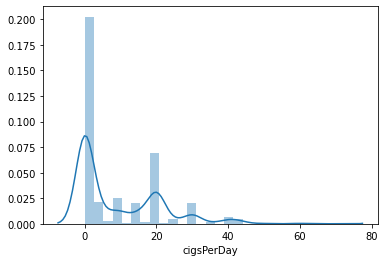

In [ ]:
sns.distplot(raw_data["cigsPerDay"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


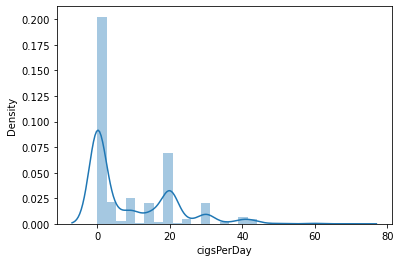

In [ ]:
sns.distplot(raw_data["cigsPerDay"])

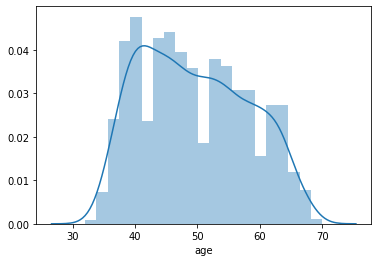

In [ ]:
sns.distplot(raw_data["age"])

### a. Correlation Heatmap

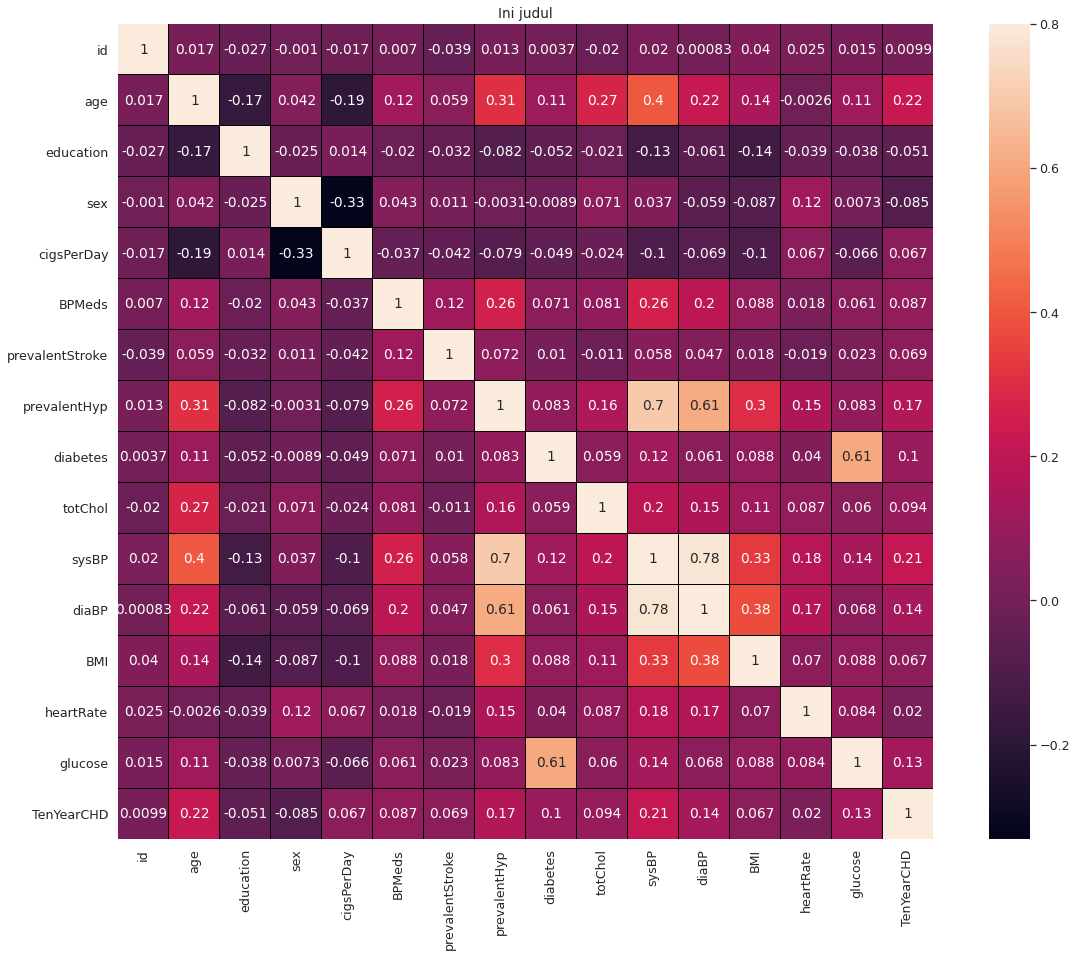

In [ ]:
corr= raw_data_imputed.corr() # Ganti raw_data_imputed dengan nama dataframe yang ingin dicek

sns.set(font_scale=1.15) # Set besar tulisan
plt.figure(figsize=(20, 15)) # Set besar heatmap

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,linecolor="black") # Annpt= False jika tidak ingin terlihat nilainya

plt.title('Ini judul'); # Buat judul heatmap

## Feature Engineering

In [ ]:
# Nambah Kolom
# Standardisasi
# Kurangin Kolom

### a. Standardization

In [ ]:
data_standarded = raw_data_imputed

from sklearn.preprocessing import StandardScaler # Import fungsi yang dibutuhkan

sc=StandardScaler() # Panggil Fungsi untuk standardization

data_standarded = sc.fit_transform(data_standarded) # Fit dan Transform suatu dataframe

# data_standarded = sc.transform(data_standarded) # Jika hanya ingin transform tanpa fit

data_standarded

array([[-1.73153995,  1.6827831 ,  0.05305814, ...,  1.1716516 ,
        -0.09021463,  2.37361557],
       [-1.73051809, -1.57621005,  2.01881889, ..., -0.33231681,
        -0.30639911, -0.42129821],
       [-1.72949624, -0.41228392, -0.92982223, ...,  1.004544  ,
         0.51510189, -0.42129821],
       ...,
       [ 1.72949624, -0.64506915,  1.03593852, ..., -0.24876301,
        -0.43610979,  2.37361557],
       [ 1.73051809,  1.21721265, -0.92982223, ...,  0.33611359,
         0.12596984, -0.42129821],
       [ 1.73153995,  0.51885698,  1.03593852, ...,  0.25255979,
         0.4286281 , -0.42129821]])

In [ ]:
data_standarded= pd.DataFrame(data_standarded, columns = raw_data_imputed.columns)
data_standarded["TenYearCHD"] = raw_data_imputed["TenYearCHD"]
data_standarded.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,-1.731540,1.682783,0.053058,0.873425,1.004731,-0.512681,-0.174342,-0.080821,-0.678658,-0.162295,-0.357314,0.690879,0.176093,-8.651790e-15,1.171652,-0.090215,1
1,-1.730518,-1.576210,2.018819,-1.144919,-0.995291,-0.766087,-0.174342,-0.080821,1.473495,-0.162295,-0.557375,1.588193,1.257462,9.680255e-01,-0.332317,-0.306399,0
2,-1.729496,-0.412284,-0.929822,0.873425,1.004731,0.078600,-0.174342,-0.080821,-0.678658,-0.162295,0.287325,-0.744824,-0.988457,-1.325992e+00,1.004544,0.515102,0
3,-1.728474,0.053287,-0.929822,-1.144919,1.004731,0.923287,-0.174342,-0.080821,1.473495,-0.162295,-0.090567,1.139536,0.425640,6.003008e-01,-0.666532,0.515102,1
4,-1.727453,1.682783,-0.929822,0.873425,1.004731,1.767973,-0.174342,-0.080821,-0.678658,-0.162295,0.087264,0.174923,0.176093,1.522126e-01,-0.499424,-0.219925,0


### b. Pemilihan Fitur

In [ ]:
# Buang id
data_standarded = data_standarded.drop(["id"], axis = 1)

data_standarded.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.682783,0.053058,0.873425,1.004731,-0.512681,-0.174342,-0.080821,-0.678658,-0.162295,-0.357314,0.690879,0.176093,-8.651790e-15,1.171652,-0.090215,1
1,-1.576210,2.018819,-1.144919,-0.995291,-0.766087,-0.174342,-0.080821,1.473495,-0.162295,-0.557375,1.588193,1.257462,9.680255e-01,-0.332317,-0.306399,0
2,-0.412284,-0.929822,0.873425,1.004731,0.078600,-0.174342,-0.080821,-0.678658,-0.162295,0.287325,-0.744824,-0.988457,-1.325992e+00,1.004544,0.515102,0
3,0.053287,-0.929822,-1.144919,1.004731,0.923287,-0.174342,-0.080821,1.473495,-0.162295,-0.090567,1.139536,0.425640,6.003008e-01,-0.666532,0.515102,1
4,1.682783,-0.929822,0.873425,1.004731,1.767973,-0.174342,-0.080821,-0.678658,-0.162295,0.087264,0.174923,0.176093,1.522126e-01,-0.499424,-0.219925,0


## Model and Evaluation

In [ ]:
# Buat data train dan data validasi
from sklearn.model_selection import train_test_split

X = data_standarded.drop(["TenYearCHD"], axis = 1)
Y = data_standarded["TenYearCHD"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) # Data train dan validasi

X_train.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1325,-1.459817,-0.929822,-1.144919,1.004731,0.923287,-0.174342,-0.080821,-0.678658,-0.162295,0.531843,-0.946719,-0.863684,0.166824,-0.248763,-0.349636
3214,0.868035,-0.929822,0.873425,1.004731,0.923287,-0.174342,-0.080821,-0.678658,-0.162295,0.331783,0.287088,-0.073453,0.137601,0.670329,-0.522584
917,1.100820,-0.929822,-1.144919,-0.995291,-0.766087,-0.174342,-0.080821,1.473495,-0.162295,1.687748,0.780610,-0.073453,0.359210,-1.167855,0.515102
3283,0.053287,0.053058,0.873425,-0.995291,-0.766087,-0.174342,-0.080821,-0.678658,-0.162295,-0.601833,-1.238346,-0.489364,-0.446862,-1.334962,0.169207
722,-0.994247,0.053058,-1.144919,1.004731,0.500943,-0.174342,-0.080821,-0.678658,-0.162295,-0.824122,-0.655092,0.342458,-1.099512,-0.248763,-0.479347


In [ ]:
# Import needed library
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


### 1. Logistic Regression

In [ ]:
# Train
lr = LogisticRegression()
lr.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Test
acc = lr.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 84.66%


### 2. SVM

In [ ]:
# Train SVM
svm = SVC()
svm.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Test
acc = svm.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 83.92%


### 3. KNN

In [ ]:
# Train
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Test
acc = KNN.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 81.27%


### 4. Decision Tree

In [ ]:
# Train
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Test
acc = tree.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 78.02%


## Predict

In [ ]:
test_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [ ]:
# Preprocessing dan FE data test

test_data["sex"] = test_data["sex"].replace({"M":0, "F":1})

test_data["is_smoking"] = test_data["is_smoking"].replace({"YES":1, "NO":0})

test_data_imputed = test_data

test_data_imputed["education"] = test_data_imputed["education"].fillna(raw_data_imputed["education"].mode().iloc[0])
test_data_imputed["cigsPerDay"] = test_data_imputed["cigsPerDay"].fillna(np.mean(raw_data_imputed["cigsPerDay"]))
test_data_imputed["BPMeds"] = test_data_imputed["BPMeds"].fillna(raw_data_imputed["BPMeds"].mode().iloc[0])
test_data_imputed["totChol"] = test_data_imputed["totChol"].fillna(np.mean(raw_data_imputed["totChol"]))
test_data_imputed["BMI"] = test_data_imputed["BMI"].fillna(np.mean(raw_data_imputed["BMI"]))
test_data_imputed["heartRate"] = test_data_imputed["heartRate"].fillna(np.mean(raw_data_imputed["heartRate"]))
test_data_imputed["glucose"] = test_data_imputed["glucose"].fillna(np.mean(raw_data_imputed["glucose"]))

data_test_standarded = test_data_imputed

data_test_standarded = sc.fit_transform(data_test_standarded)

data_test_standarded

array([[-1.7300095 , -0.79605657,  0.01038954, ..., -0.35935492,
        -1.26570936,  0.85405531],
       [-1.72592447,  0.73575136,  0.98931524, ...,  0.70851107,
        -0.61184306, -1.08937391],
       [-1.72183944,  0.97141412, -0.96853616, ..., -0.06881382,
         2.00362216,  0.02516053],
       ...,
       [ 1.72183944,  0.61791998, -0.96853616, ...,  0.14781771,
         3.63828791,  0.02516053],
       [ 1.72592447, -0.56039381,  0.98931524, ..., -0.75693749,
        -0.03971004,  0.48387832],
       [ 1.7300095 ,  0.73575136, -0.96853616, ..., -0.60911833,
        -0.69357634, -0.1176593 ]])

In [ ]:
len(test_data)

848

In [ ]:
# Ubah hasil standardisasi jadi dataframe
data_test_standarded= pd.DataFrame(data_test_standarded, columns = test_data_imputed.columns)

data_test_standarded.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.730009,-0.796057,0.010390,-1.187051,1.040931,2.183001,-0.170664,-0.059584,-0.641079,-0.1632,-0.682270,-0.684911,-1.566504,-0.359355,-1.265709,0.854055
1,-1.725924,0.735751,0.989315,0.842424,-0.960678,-0.726554,-0.170664,-0.059584,-0.641079,-0.1632,-1.043483,-0.446398,-0.038006,0.708511,-0.611843,-1.089374
2,-1.721839,0.971414,-0.968536,0.842424,1.040931,0.936049,-0.170664,-0.059584,1.559871,-0.1632,0.594017,2.320362,1.490491,-0.068814,2.003622,0.025161
3,-1.717754,-0.324731,0.989315,0.842424,-0.960678,-0.726554,-0.170664,-0.059584,-0.641079,-0.1632,-0.104328,-1.376602,-1.479161,-0.619313,-0.448376,-0.163931
4,-1.713669,-0.678225,-0.968536,-1.187051,-0.960678,-0.726554,-0.170664,-0.059584,-0.641079,-0.1632,-1.814071,-0.613357,0.355036,-0.005099,-1.756109,0.025161


In [ ]:
# Buang fitur "id"
data_test_standarded = data_test_standarded.drop(["id"], axis = 1)

In [ ]:
# Bikin prediksi

# Train dulu
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Lalu Prediksi

y_pred = lr.predict(data_test_standarded)

y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
len(y_pred)

848

In [ ]:
np.sum(y_pred)

18

In [ ]:
# Buat dataframe untuk submission
sub = test_data[["id","age"]]

sub["TenYearCHD"] = y_pred

sub = sub.drop(["age"], axis = 1)

sub.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,TenYearCHD
0,3390,0
1,3391,0
2,3392,0
3,3393,0
4,3394,0


In [ ]:
# Export to csv

export_csv = sub.to_csv("hasil_1.csv", index= False)